In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mt
import seaborn as sns
import sklearn.metrics as sm
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix,classification_report

# READING THE DATA

In [2]:
data=pd.read_csv("iris.csv",index_col=0)

In [3]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


# DATA VISUALIZATION

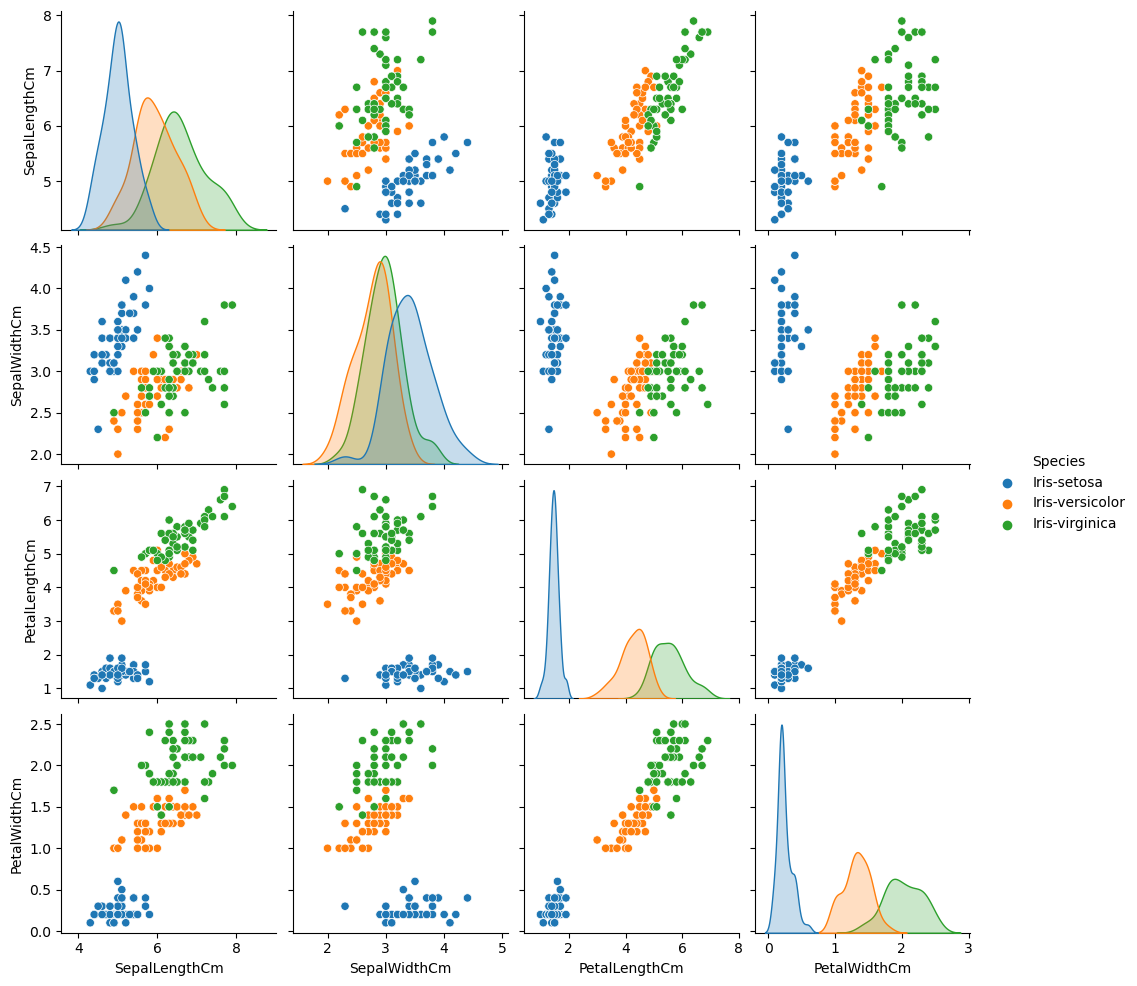

In [4]:
sns.pairplot(data,hue='Species')

# FINDING THE CORRELATION MATRIX

In [5]:
data.corr()

C:\Users\user\AppData\Local\Temp\ipykernel_6360\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


# HEATMAP

C:\Users\user\AppData\Local\Temp\ipykernel_6360\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

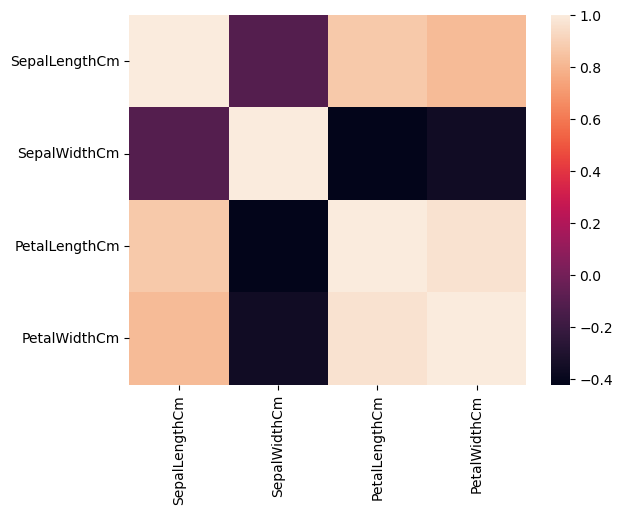

In [10]:
sns.heatmap(data.corr())

# DATA PREPROCESSING

In [7]:
target=data['Species']
df=data.copy()
df=df.drop('Species',axis=1)
df.shape

(150, 4)

In [14]:
#defining the attributes and labels
X=data.iloc[:,[0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

# TRAINING THE MODEL

In [16]:
#test and train
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print("training split:",X_train.shape)
print("testing split:",X_test.shape)

training split: (120, 4)
testing split: (30, 4)


In [18]:
#defining decision tree algorithm
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# CLASSIFICATION REPORT AND CONFUSION MATRIX

In [19]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [20]:
print("Accuracy:",sm.accuracy_score(y_test,y_pred))

Accuracy: 1.0


In [21]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# visualizing the trained model

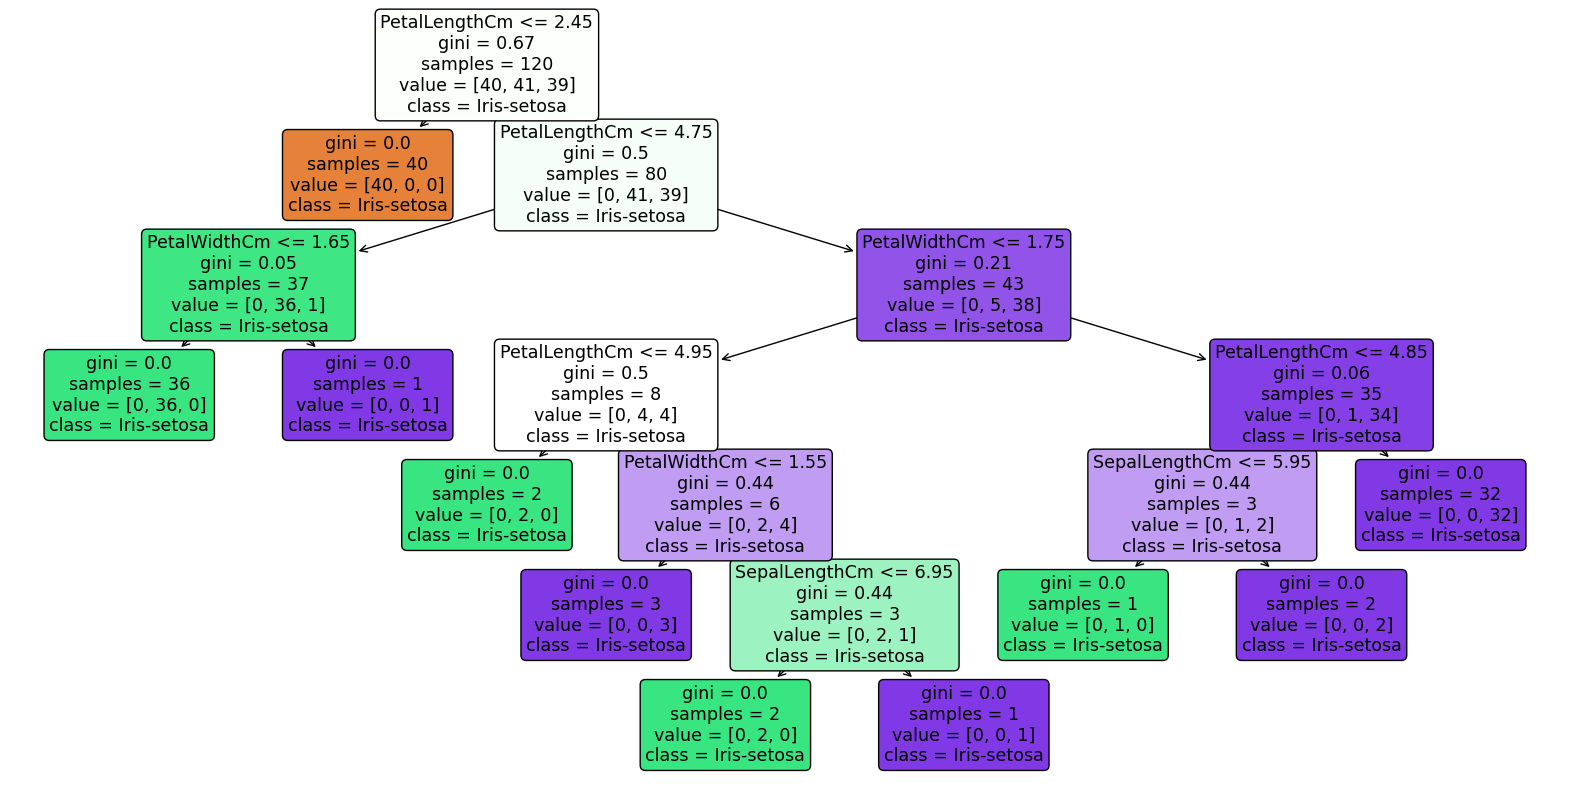

In [23]:
mt.figure(figsize=(20,10))
tree=plot_tree(dtree,feature_names=df.columns,precision=2,rounded=True,filled=True,class_names=target.values)

# PREDICTION OF RIGHT CLASS

In [25]:
#testing new data
New_data = ['Iris-Setosa','Iris-versicolor','Iris-viginica']
test=np.array([5.2,1,4,2.5])
test=test.reshape(1,-1)
pred=dtree.predict(test)
print("Input data:",test)
print("Category of input Data:",New_data[int(pred[0])])

Input data: [[5.2 1.  4.  2.5]]
Category of input Data: Iris-viginica
